In [1]:
#Task 4 : Sales prediction using python

In [2]:
import numpy as np
import pandas as pd
#data Visulalization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = r"C:\Users\Aryan\Downloads\advertising.csv"
sales = pd.read_csv(df)
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
print(sales.shape)

(200, 4)


<Axes: xlabel='Sales', ylabel='TV'>

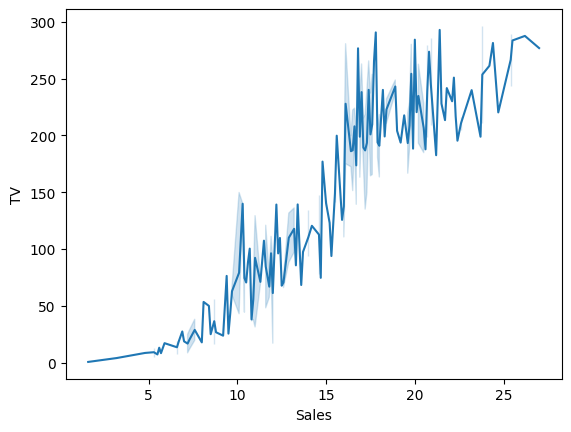

In [8]:
#Sales trend with respect to advertising in Television
sns.lineplot(x=sales['Sales'],y=sales['TV'])

<Axes: xlabel='Sales', ylabel='Radio'>

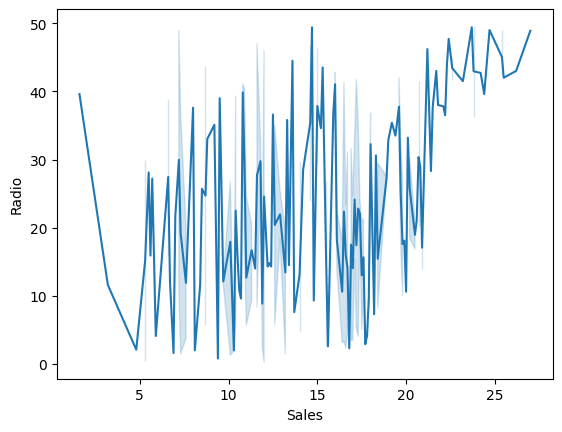

In [9]:
#Sales trend with respect to advertising in Radio
sns.lineplot(x=sales['Sales'],y=sales['Radio'])

<Axes: xlabel='Sales', ylabel='Newspaper'>

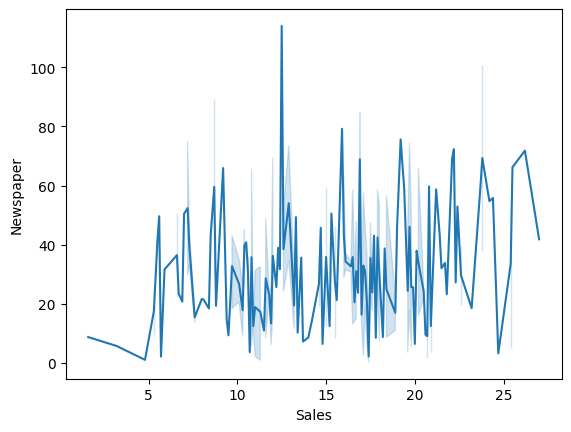

In [10]:
#Sales trend with respect to advertising in Newspaper
sns.lineplot(x=sales['Sales'],y=sales['Newspaper'])

<Axes: >

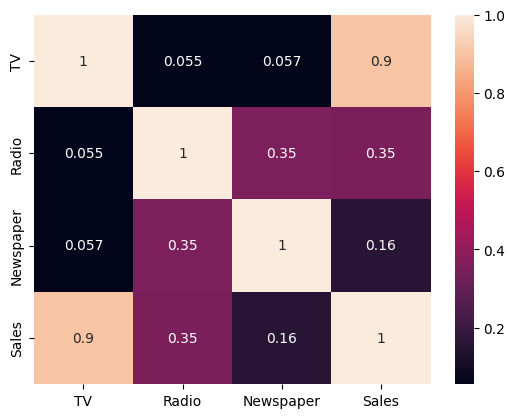

In [11]:
sns.heatmap(sales.corr(),annot=True)

<Axes: xlabel='TV', ylabel='Sales'>

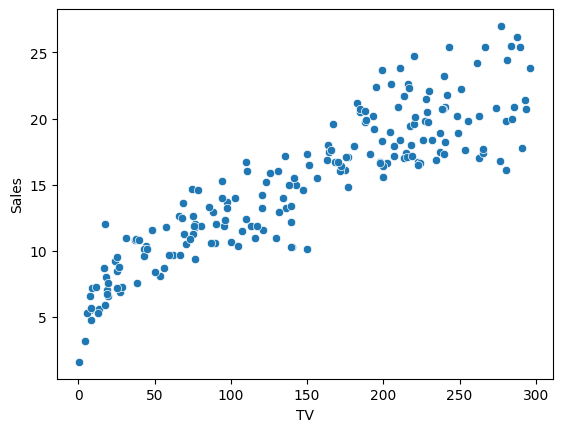

In [47]:
sns.scatterplot(x='TV',y='Sales',data=sales) #scatter plot b/w tv and sales

<Axes: xlabel='Radio', ylabel='Sales'>

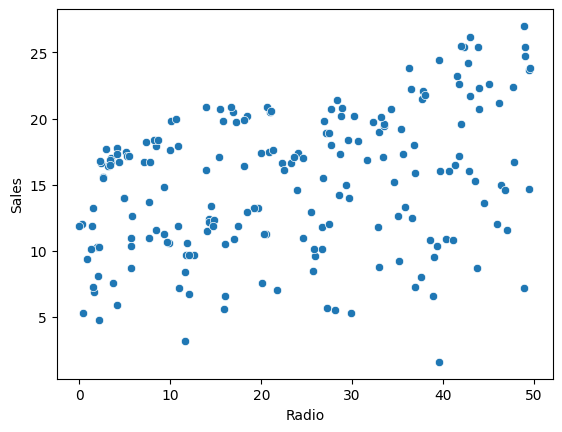

In [48]:
#The above plot shows strong positive correlation between the sales done by television
sns.scatterplot(x='Radio',y='Sales',data=sales)

<Axes: xlabel='Newspaper', ylabel='Sales'>

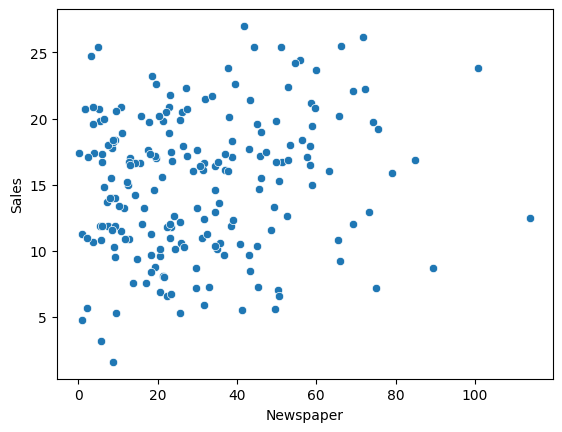

In [49]:
#The above plot shows weak positive correlation between the sales done by adverstising through radio
sns.scatterplot(x='Newspaper',y='Sales',data=sales) 

In [ ]:
#The above plot shows  positive correlation between the sales and Newspaper but it is weak compared to Television

In [24]:
#model training
X = sales[['TV','Radio','Newspaper']]
Y = sales['Sales']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=40)

In [33]:
from sklearn.discriminant_analysis import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
#model training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
LinearRegression()

LinearRegression()

In [39]:
#Evaluating model
y_pred = model.predict(X_test)

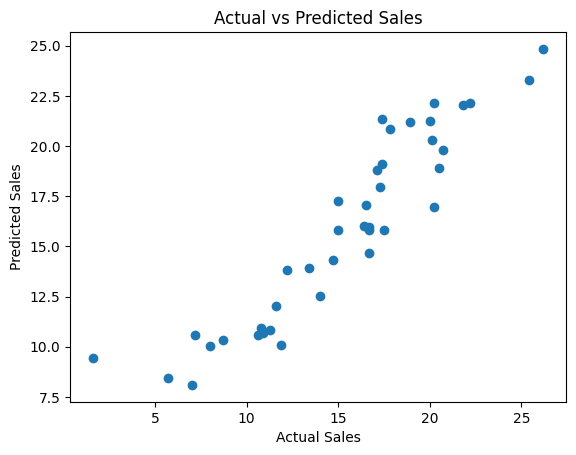

In [40]:
#Scatter plot b/w actual sales and predicted sales
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [45]:
#Prediction of sales
new_data=pd.DataFrame({'TV':[100],'Radio':[40],'Newspaper':[20]})
predicted_sales=model.predict(new_data)
print("Predicted Sales:",predicted_sales[0])

Predicted Sales: 14.716568611943726
